# Aprendizagem não-supervisionada

Este notebook serve de base para a aula 5 do curso IA para todos.

## Gerando o conjunto exemplo

In [10]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(
    n_samples=[200, 800, 200], 
    centers=[
        [23, 49],
        [50, 25],
        [77, 51]
    ],
    cluster_std=[5, 10, 5],
    random_state=42
)

Text(0, 0.5, 'X2')

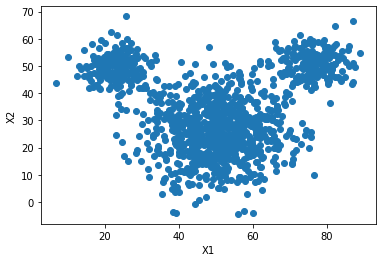

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.xlabel('X1')
plt.ylabel('X2')

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


df = pd.DataFrame(
    np.hstack([X, y.reshape(-1, 1)]),
    columns=['X1', 'X2', 'group']
)

centers = df.groupby('group').mean().values


Text(0, 0.5, 'X2')

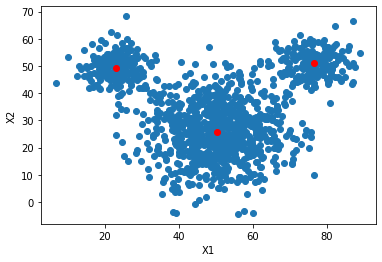

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

## Selecionando os centros iniciais

Text(0, 0.5, 'X2')

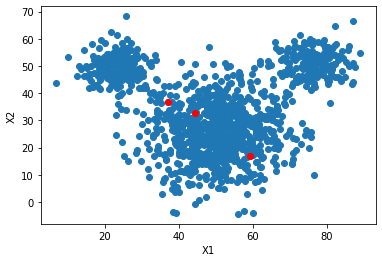

In [14]:
np.random.seed(42)
first_centers = X[np.random.choice(len(X), 3, replace=False)]

plt.scatter(X[:,0], X[:,1])
plt.scatter(first_centers[:,0], first_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

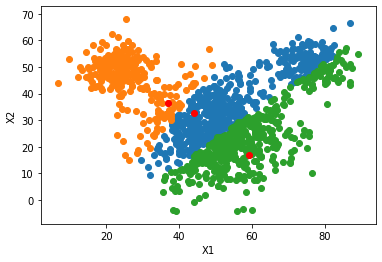

In [15]:
first_group = np.argmin(
    euclidean_distances(X, first_centers), axis=1
)

plt.scatter(X[first_group==0,0], X[first_group==0,1])
plt.scatter(X[first_group==1,0], X[first_group==1,1])
plt.scatter(X[first_group==2,0], X[first_group==2,1])
plt.scatter(first_centers[:,0], first_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

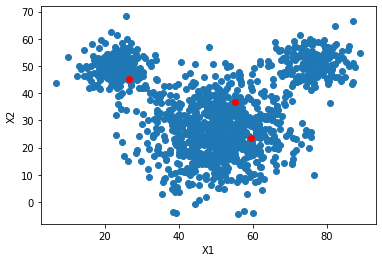

In [16]:
df = pd.DataFrame(
    np.hstack([X, first_group.reshape(-1, 1)]),
    columns=['X1', 'X2', 'group']
)

second_centers = df.groupby('group').mean().values
plt.scatter(X[:,0], X[:,1])
plt.scatter(second_centers[:,0], second_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

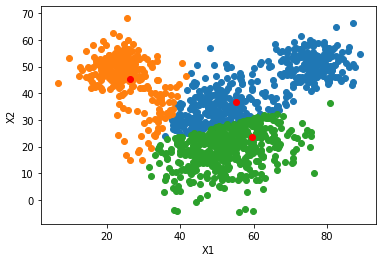

In [17]:
second_group = np.argmin(
    euclidean_distances(X, second_centers), axis=1
)

plt.scatter(X[second_group==0,0], X[second_group==0,1])
plt.scatter(X[second_group==1,0], X[second_group==1,1])
plt.scatter(X[second_group==2,0], X[second_group==2,1])
plt.scatter(second_centers[:,0], second_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

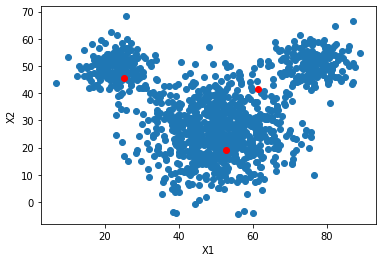

In [18]:
df = pd.DataFrame(
    np.hstack([X, second_group.reshape(-1, 1)]),
    columns=['X1', 'X2', 'group']
)

third_centers = df.groupby('group').mean().values
plt.scatter(X[:,0], X[:,1])
plt.scatter(third_centers[:,0], third_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

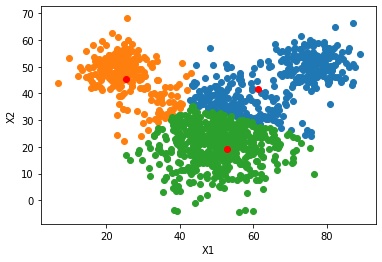

In [19]:
third_group = np.argmin(
    euclidean_distances(X, third_centers), axis=1
)

plt.scatter(X[third_group==0,0], X[third_group==0,1])
plt.scatter(X[third_group==1,0], X[third_group==1,1])
plt.scatter(X[third_group==2,0], X[third_group==2,1])
plt.scatter(third_centers[:,0], third_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

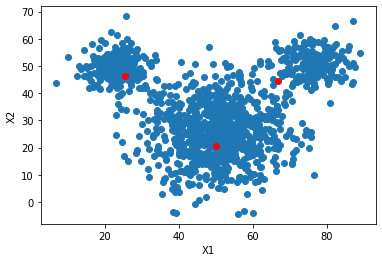

In [20]:
df = pd.DataFrame(
    np.hstack([X, third_group.reshape(-1, 1)]),
    columns=['X1', 'X2', 'group']
)

fourth_centers = df.groupby('group').mean().values
plt.scatter(X[:,0], X[:,1])
plt.scatter(fourth_centers[:,0], fourth_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

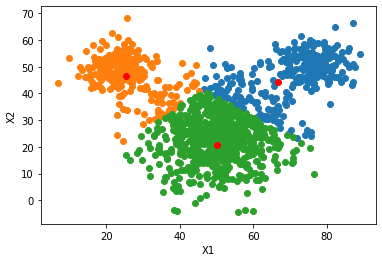

In [21]:
fourth_group = np.argmin(
    euclidean_distances(X, fourth_centers), axis=1
)

plt.scatter(X[fourth_group==0,0], X[fourth_group==0,1])
plt.scatter(X[fourth_group==1,0], X[fourth_group==1,1])
plt.scatter(X[fourth_group==2,0], X[fourth_group==2,1])
plt.scatter(fourth_centers[:,0], fourth_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

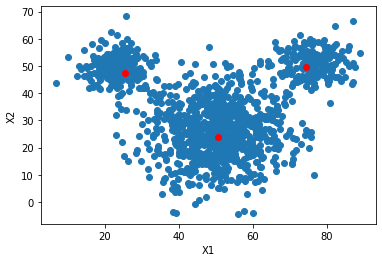

In [22]:
final_group = fourth_group
final_centers = fourth_centers

for i in range(1000):    

    df = pd.DataFrame(
        np.hstack([X, final_group.reshape(-1, 1)]),
        columns=['X1', 'X2', 'group']
    )

    final_centers = df.groupby('group').mean().values
    
    final_group = np.argmin(
        euclidean_distances(X, final_centers), axis=1
    )
    
plt.scatter(X[:,0], X[:,1])
plt.scatter(final_centers[:,0], final_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

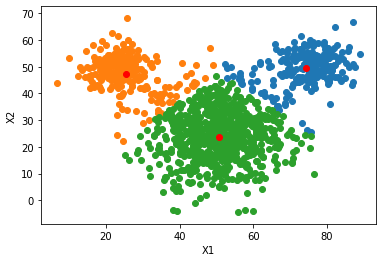

In [23]:
plt.scatter(X[final_group==0,0], X[final_group==0,1])
plt.scatter(X[final_group==1,0], X[final_group==1,1])
plt.scatter(X[final_group==2,0], X[final_group==2,1])
plt.scatter(final_centers[:,0], final_centers[:,1], c='r')
plt.xlabel('X1')
plt.ylabel('X2')

 ## K-médias do scikit-learn

In [24]:
from sklearn.cluster import KMeans

km3 = KMeans(n_clusters=3)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'K=3')

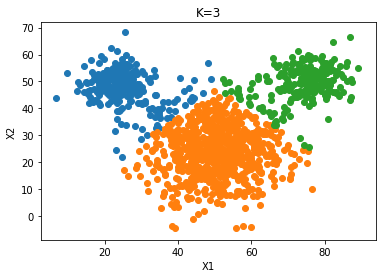

In [25]:
preds_3 = km3.predict(X)

plt.scatter(X[preds_3==0,0], X[preds_3==0,1])
plt.scatter(X[preds_3==1,0], X[preds_3==1,1])
plt.scatter(X[preds_3==2,0], X[preds_3==2,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K=3')

Text(0.5, 1.0, 'K=2')

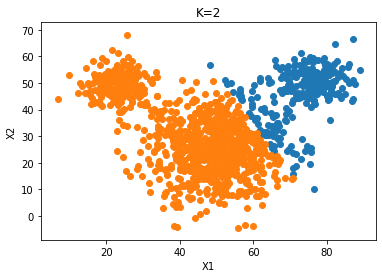

In [26]:
km2 = KMeans(n_clusters=2)
km2.fit(X)
preds_2 = km2.predict(X)

plt.scatter(X[preds_2==0,0], X[preds_2==0,1])
plt.scatter(X[preds_2==1,0], X[preds_2==1,1])
plt.scatter(X[preds_2==2,0], X[preds_2==2,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K=2')

Text(0.5, 1.0, 'K=5')

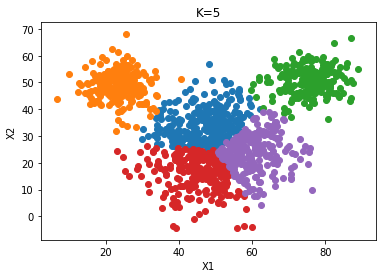

In [27]:
km5 = KMeans(n_clusters=5)
km5.fit(X)
preds_5 = km5.predict(X)

plt.scatter(X[preds_5==0,0], X[preds_5==0,1])
plt.scatter(X[preds_5==1,0], X[preds_5==1,1])
plt.scatter(X[preds_5==2,0], X[preds_5==2,1])
plt.scatter(X[preds_5==3,0], X[preds_5==3,1])
plt.scatter(X[preds_5==4,0], X[preds_5==4,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K=5')

## Análise de componentes principais

In [80]:
np.random.seed(42)

group_1 = np.random.multivariate_normal(
    [2, 2],
    [
        [10, 1],
        [1, 1]
    ],
    size=500
)

group_2 = np.random.multivariate_normal(
    [13, 6],
    [
        [10, 1],
        [1, 1]
    ],
    size=500
)

Text(0, 0.5, 'X2')

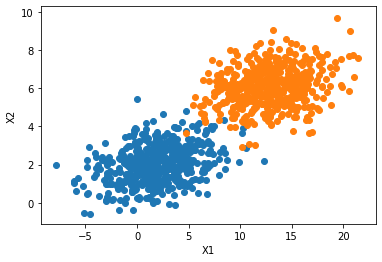

In [105]:
plt.scatter(group_1[:, 0], group_1[:, 1])
plt.scatter(group_2[:, 0], group_2[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_ = np.vstack([group_1, group_2])
ss = StandardScaler().fit(X_)
X_ = ss.transform(X_)

pca = PCA()
pca.fit(X_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [103]:
group_1_transformed = pca.transform(ss.transform(group_1))
group_2_transformed = pca.transform(ss.transform(group_2))

Text(0, 0.5, 'C2')

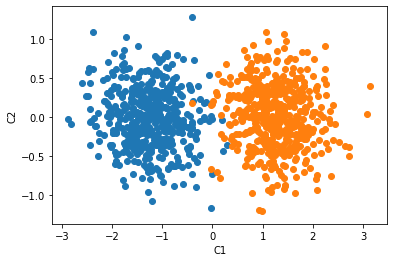

In [104]:
plt.scatter(group_1_transformed[:, 0], group_1_transformed[:, 1])
plt.scatter(group_2_transformed[:, 0], group_2_transformed[:, 1])
plt.xlabel('C1')
plt.ylabel('C2')

In [79]:
pca.explained_variance_ratio_

array([0.97098278, 0.02901722])